# Project Proposal

In [1]:
library(tidyverse)
library(repr)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


**Introduction**

Tennis is a widely popular individual sport played by millions of people around the world with a rich history dating back to the 19th century. Tennis players are ranked globally based on their performance over a specific period. The most widely recognized ranking system is maintained by the Association of Tennis Professionals (ATP) and the Women's Tennis Association (WTA). These rankings are determined by a player's results in various tournaments. <br>
Our question is: What current ranking would a player have? <br>
To answer this question, we will be working with the dataset "Player Stats for Top 500 Players". 

**Preliminary Exploratory Data Analysis**

In [2]:
player_stats <- read_csv("data/player_stats.csv")
player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,22 (11-02-1997),Poland,Right-handed,Wikipedia,31 (1398),31 (20-01-2020),Hubert Hurkacz,Two-handed,"$1,517,157",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,28 (18-11-1991),United States,Right-handed,Wikipedia,307 (131),213 (31-10-2016),Sekou Bangoura,Two-handed,"$278,709",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,21 (12-05-1998),"Taiwan, Province of China",Right-handed,Wikipedia,232 (205),229 (04-11-2019),Tung Lin Wu,Two-handed,"$59,123",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,25 (29-07-1994),Uzbekistan,Right-handed,Wikipedia,417 (81),253 (17-07-2017),Sanjar Fayziev,Two-handed,"$122,734",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
player_stats_rename <- player_stats |>
    separate("Age", into = c("age", "birthday"), sep = "\\(")|>
    separate("Current Rank", into = c("current_rank", "points"), sep ="\\(") |>
    rename(name = Name)|>
    select(name, age, current_rank)|>
    mutate(current_rank = as.numeric(current_rank))|>
    arrange(current_rank)
player_stats_rename

name,age,current_rank
<chr>,<chr>,<dbl>
Rafael Nadal,33,1
Novak Djokovic,32,2
Roger Federer,38,3
Daniil Medvedev,23,4
Dominic Thiem,26,5
Stefanos Tsitsipas,21,6
Alexander Zverev,22,7
Matteo Berrettini,23,8
Roberto Bautista Agut,31,9


After careful inspection, we concluded that this dataset is from four years ago (Nadal is 37 this year, not 33). We see that John Millman's `age` is not available, since he is 34 years old this year, we can replace the `NA` in his age with his age four years ago, which is 30. There are also multiple `NA` in the `current_rank` column, so we can also fill those in using the website where the dataset was from.

In [5]:
player_stats_complete <- player_stats_rename|>       
    mutate(age = ifelse(is.na(age), 30, age))|>
    mutate(current_rank = ifelse(is.na(current_rank),
                             case_when(
                                 name == "Scott Griekspoor" ~ 472,
                                 name == "Brandon Holt" ~ 499,
                                 name == "Evan Song" ~ 314,
                                 name == "John Millman" ~ 48,
                                 name == "Sebastian Fanselow" ~ 494),
                             current_rank))|>
    arrange(current_rank)
player_stats_complete

name,age,current_rank
<chr>,<chr>,<dbl>
Rafael Nadal,33,1
Novak Djokovic,32,2
Roger Federer,38,3
Daniil Medvedev,23,4
Dominic Thiem,26,5
Stefanos Tsitsipas,21,6
Alexander Zverev,22,7
Matteo Berrettini,23,8
Roberto Bautista Agut,31,9


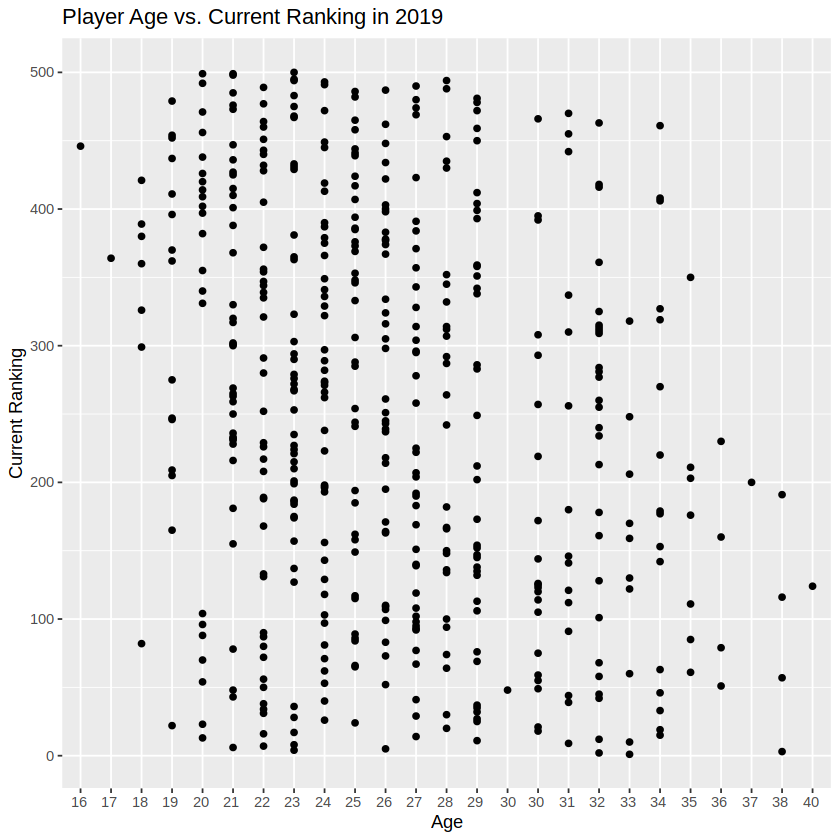

In [6]:
player_stats_plot <- player_stats_complete |>
    ggplot(aes(x = age, y = current_rank))+
    geom_point()+
    labs(x = "Age", y = "Current Ranking")+
    ggtitle("Player Age vs. Current Ranking in 2019")
player_stats_plot

We can also look at the average ranking of each age in the top 500 players.

In [7]:
avg_current_rank <- player_stats_complete|>
group_by(age)|>
summarize(current_rank = mean(current_rank))
avg_current_rank

age,current_rank
<chr>,<dbl>
16,446.0000
17,364.0000
18,322.4286
19,315.3333
20,303.6364
21,303.0000
22,251.9512
23,267.2955
24,262.6512


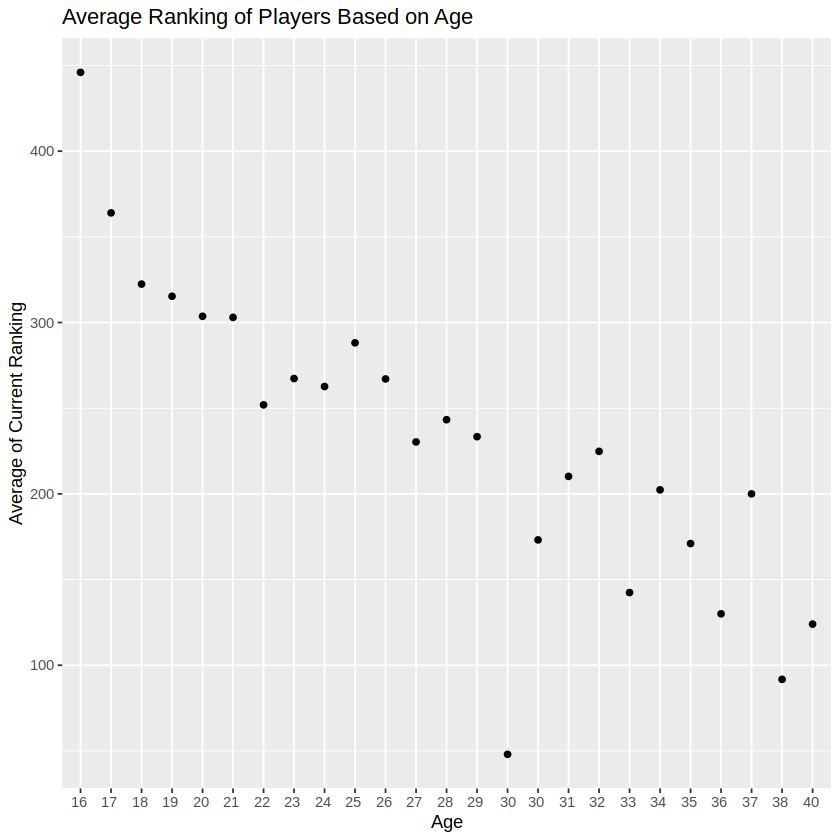

In [13]:
avg_rank_plot <- avg_current_rank|>
    ggplot(aes(x = age, y = current_rank))+
    geom_point()+
    labs(x = "Age", y = "Average of Current Ranking")+
    ggtitle("Average Ranking of Players Based on Age")

avg_rank_plot

**Methods**



We will conduct our data analysis focusing on two variables/columns: current ranking and age. We will be trying to predict a player's current ranking based on their age using regression. We decided on predicting based on age because age determines many factors that could impact a player's ranking. For example, physicality. Younger players might have more endurance, agility, strength, and be less prone to injury. We can visualize the results using a scatter plot or a line graph with the x-axis being `age`, and the y-axis being their `current_rank`, similar to the scatter plot above.

**Expected Outcomes and Significance**

We expect to find that players in the prime of their career, around early 30s, will have the highest current ranking. Such findings could impact a player's salary and earnings. It could also impact how they are perceived by sports media, for example, less biases and unnecessary criticism towards players aging out of their prime. This could lead to further questions such as how a player's current rank changes over time as they age or throughout their career.